In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("F:\\ML_DATASETS\\Iris_data_sample.csv")

In [4]:
df1=pd.read_csv("F:\\ML_DATASETS\\Iris_data_sample.csv",index_col=0)  # index_col is used to remove first column

In [5]:
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.4,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# UNIVARIATE ANALYSIS

In [7]:
df1_setosa=df1.loc[df1['Species']=='Iris-setosa']

In [8]:
df1_virginica=df1.loc[df1['Species']=='Iris-virginica']
df1_versicolor=df1.loc[df1['Species']=='Iris-versicolor']

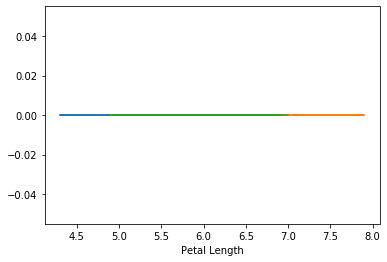

In [9]:
plt.plot(df1_setosa['SepalLengthCm'],np.zeros_like(df1_setosa['SepalLengthCm']))
plt.plot(df1_virginica['SepalLengthCm'],np.zeros_like(df1_virginica['SepalLengthCm']))
plt.plot(df1_versicolor['SepalLengthCm'],np.zeros_like(df1_versicolor['SepalLengthCm']))
plt.xlabel('Petal Length')
plt.show()

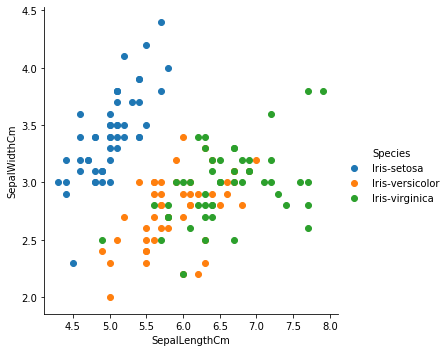

In [10]:
sb.FacetGrid(df1,hue="Species",height=5).map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()   # addlegend-shows the species in right of graph   
plt.show()

# MULTIVARIATE ANALYSIS

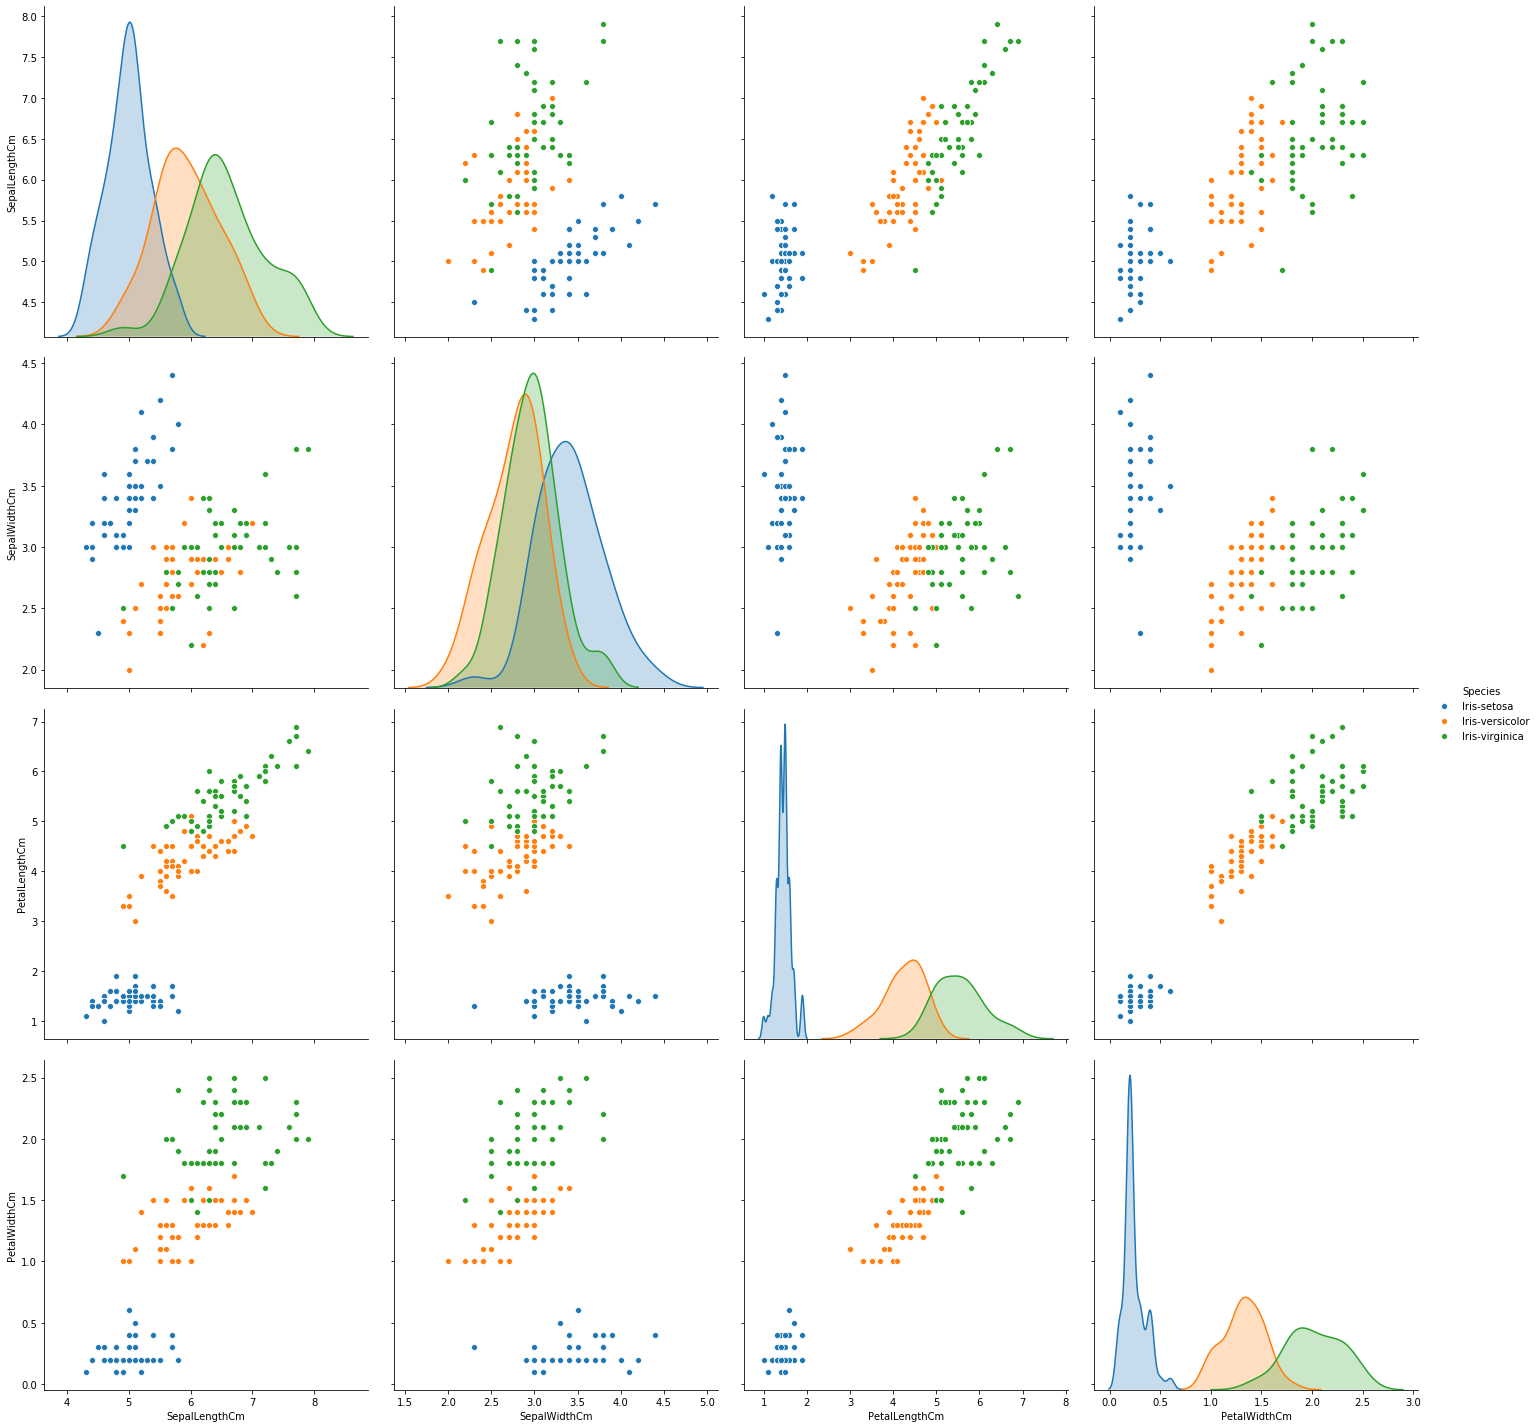

In [11]:
sb.pairplot(df1,hue="Species",height=5)

In [13]:
df1.shape

(150, 5)

In [15]:
df1['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [19]:
df1.isnull() # to check null values

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False
10,False,False,False,False,False


# Training the model using knnearest classification and modeling with scikit learn

In [29]:
x=df1.iloc[:,:-1]      #data
y=df1.iloc[:,4]          #target 


In [26]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [30]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [52]:
x_new=np.array([[5,2.9,1,0.3]])
print("X_new.shape:",x_new.shape)

X_new.shape: (1, 4)


In [53]:
prediction=knn.predict(x_new)
print("prediction: ",prediction)
#print("Predicted target name:",df1[y])

prediction:  ['Iris-setosa']


# Evaluating the model whether the prediction is correct or not

In [37]:
y_pred=knn.predict(X_test)
print('Test set prediction : ',y_pred)

Test set prediction :  ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


In [38]:
print("Test set score:",np.mean(y_pred==y_test))

Test set score: 0.9736842105263158


In [40]:
print("Test set score:",knn.score(X_test,y_test))

Test set score: 0.9736842105263158
